## Normalize

In [1]:
from ArticutAPI import Articut

In [2]:
# username = "" #這裡填入您在 https://api.droidtown.co 使用的帳號 email。若使用空字串，則預設使用每小時 2000 字的公用額度。
# apikey   = "" #這裡填入您在 https://api.droidtown.co 登入後取得的 api Key。若使用空字串，則預設使用每小時 2000 字的公用額度。
# articut = Articut(username, apikey)
# inputSTR = "會被大家盯上，才證明你有實力。"
# resultDICT = articut.parse(inputSTR)
# pprint(resultDICT)

In [3]:
import json
import os
import re
import numpy as np
import shutil

In [4]:
# datas = []

# for f_id,folder in enumerate(os.listdir('判決')):
#     print(folder)
#     for j_id,j_file in enumerate(os.listdir('判決/'+folder)):
#         if '金' in j_file and '刑事_1' not in j_file:
#             shutil.copyfile(f'判決/{folder}/{j_file}' , f'金融判決/{j_file}')
#             os.rename(f'金融判決/{j_file}' , f'金融判決/金_{folder}_{j_id}.json')

In [5]:
# "with open('金融判決/金_臺灣橋頭地方法院_刑事_51760', 'r', encoding = 'utf-8') as obj:
#     print(clean_str(json.load(obj)['judgement']))"

In [44]:
def clean_str(string):
    string = re.sub(r"\u3000", "", string)
    string = re.sub(r"\s{1,}", "", string)
    string = re.sub(r"\r", "", string)
    string = re.sub(r"\n", "", string)
    string = re.sub(r"【[^【】]+】","",string)
    string = re.sub(r"（[^（）]+）","",string)
    string = re.sub(r"「[^「」]+」","",string)
    string = re.sub(r"\([^\(\)]+\)","",string)
    if '審判長' in string:
        string = string.split('審判長')[0]
    else:
        string = string.split('書記官')[0]
    return string.strip()

In [48]:
datas = []

for idx,path in enumerate(os.listdir('金融判決')):
#     if idx == 10:
#         break
    with open('金融判決/'+path, 'r', encoding = 'utf-8') as obj:
        data = json.load(obj)
#         print()
        if data['judgement'] != "" and '由於裁判書全文大於' not in data['judgement']:
            datas.append(data)

In [10]:
len(datas)

21126

In [32]:
texts = []
tags = []
errors_fs = []
for idx,data in enumerate(datas):
    try:
        if len(clean_str(data['judgement'])) < 3000 and len(data['relatedIssues']) < 15:
            texts.append(clean_str(data['judgement']))
            _ = []
            for law in data['relatedIssues']:
                str_ = law['lawName']+law['issueRef']
                if not str_ in _:
                    _.append(str_.strip())
            tags.append(_)
    except:
        errors_fs.append(idx)
        continue

In [33]:
T_tags = [t for tag in tags for t in tag]
len(set(T_tags))

1382

In [34]:
tag_counter = {}
for t in T_tags:
    if t not in tag_counter:
        tag_counter[t] = 1
    else:
        tag_counter[t] += 1

c = 0
for t in tag_counter:
    if tag_counter[t] < 6:
        c += 1 
c

959

In [35]:
del_idx = []

for idx,tag in enumerate(tags):
    del_list = []
    if len(tag) == 1:
        continue
    for t in tag:
        if tag_counter[t] < 6:
            del_list.append(t)
    if len(del_list) == len(tag):
        del_idx.append(idx)
        continue
    if del_list != []:
        for d_l in del_list:
            tags[idx].remove(d_l)

In [36]:
len(del_idx)

1054

In [37]:
T_tags = [t for tag in tags for t in tag]
len(set(T_tags))

516

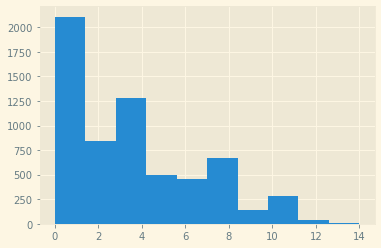

In [38]:
import matplotlib.pyplot as plt
plt.style.use("Solarize_Light2")
plt.hist([len(t) for t in tags])
plt.show()

In [39]:
tag2idx = {t:i for i,t in enumerate(set(T_tags))}
idx2tag = {tag2idx[t]:t for t in tag2idx}

In [40]:
len(errors_fs)

907

In [41]:
def T2I(x):
    return tag2idx[x]

tags_num = [list(map(T2I , t)) for t in tags]

In [42]:
tags_num

[[26, 269],
 [381, 291, 257, 164, 453],
 [213, 147, 475],
 [342, 405, 208, 42, 209],
 [238],
 [87, 97, 309, 209],
 [342, 242, 424, 226, 356, 502, 385, 277],
 [123, 13, 427, 44],
 [193, 37, 437, 44, 92, 79],
 [103, 213, 345, 239, 433, 398, 483, 372, 178, 297],
 [342, 49, 0, 92],
 [89],
 [],
 [119],
 [434],
 [26, 291, 182, 379],
 [341, 257],
 [455],
 [26, 291, 182, 379],
 [341, 257],
 [26, 298],
 [26, 298],
 [487, 302, 216, 316],
 [],
 [],
 [],
 [381, 291, 201, 257, 111],
 [26, 269],
 [342, 45, 388, 404, 424, 310, 36, 269, 486],
 [172, 44],
 [342, 45, 388, 140, 170, 424, 310, 269, 52, 27],
 [342, 45, 388, 323, 424, 310, 43, 483, 71],
 [193, 423, 391, 44, 71],
 [342, 424, 423, 391, 44, 411, 214],
 [193, 37, 437, 44, 27, 71, 92],
 [342, 424, 37, 148, 437, 44, 136],
 [212, 194, 105, 37, 148, 437, 71, 79],
 [129, 213, 345, 388, 170, 424, 310, 43, 71],
 [213, 345, 170, 424, 43, 343, 52, 27, 71, 54],
 [213, 345, 140, 488, 193, 239, 433, 398, 483, 411, 27, 71],
 [342, 424, 172, 44, 411, 71],
 [

In [43]:
len(max(texts , key=len))

2999

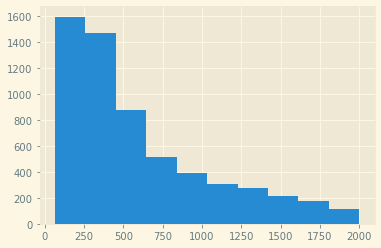

In [22]:
import matplotlib.pyplot as plt
plt.style.use("Solarize_Light2")
plt.hist([len(t) for t in texts])
plt.show()

### CKIP Transformers

In [23]:
from ckip_transformers.nlp import CkipWordSegmenter, CkipPosTagger, CkipNerChunker
from keras.preprocessing.text import Tokenizer

In [24]:
ws_driver = CkipWordSegmenter(level=3,device=0)
ner_driver = CkipNerChunker(level=3,device=0)

In [25]:
text = [
   "傅達仁今將執行安樂死，卻突然爆出自己20年前遭緯來體育台封殺，他不懂自己哪裡得罪到電視台。",
   "美國參議院針對今天總統布什所提名的勞工部長趙小蘭展開認可聽證會，預料她將會很順利通過參議院支持，成為該國有史以來第一位的華裔女性內閣成員。",
   "空白 也是可以的～",
]
# ws  = ws_driver(text)
ws = ws_driver(text, batch_size=16)
ner = ner_driver(text, use_delim=True)

Inference: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 87.79it/s]


In [26]:
def inp_len(x):
    if len(x) > 0:
        return x

docs = []
for text in texts:
    doc = []
    for t in text.split('，'):
        if '。' in t:
            doc.extend(t.split('。'))
        else:
            doc.append(t)
    doc = list(filter(inp_len,doc))
    if doc != []:
        docs.append(doc)

In [27]:
c = 0
for doc in docs:
    for sent in doc:
        if len(sent) == 0:
            c += 1
            print(sent)
c

0

In [28]:
docs_p = []
sentence_length = []
doc_length = []
# ws = ws_driver(docs , batch_size=16)
for doc in docs:
    ws = ws_driver(doc , batch_size=16)
    d_p = []
    s_len = []
    for voc in ws:
        d_p.append(voc)
        s_len.append(len(voc))
    sentence_length.append(s_len)
    docs_p.append(d_p)
    doc_length.append(len(s_len))

Inference: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 91.14it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 85.81it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 99.99it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 87.07it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 38.52it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 91.00it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 90.72it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 81.30it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 59.79it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 68.36it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 60.16it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 60.45it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 58.98it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 38.87it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 42.22it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 66.85it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 41.78it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 51.15it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 48.60it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 54.62it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 71.73it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 62.67it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 59.17it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 66.84it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 50.13it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 50.13it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 87.13it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 59.97it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 62.67it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20.05it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 58.96it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 71.62it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 71.62it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 58.98it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 54.18it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 52.46it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 59.27it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 37.14it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 62.61it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 56.42it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 58.98it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 62.11it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 63.38it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 77.13it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 37.35it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 55.70it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 58.41it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 66.28it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 77.13it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 69.15it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 37.15it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 58.98it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 69.15it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 30.77it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28.65it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 23.38it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 48.83it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 32.55it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 50.93it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 69.15it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 58.99it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 65.62it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 66.87it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 58.89it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 32.55it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 58.98it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 36.79it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 80.47it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 64.65it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 59.85it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 69.13it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 60.16it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 58.98it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 50.98it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 66.85it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 66.78it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 62.56it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 94.00it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 91.15it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 87.10it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 89.57it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 83.56it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 81.76it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 83.37it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 91.15it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 83.47it/s]


Inference: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 87.19it/s]


In [ ]:
sentence_length

### 句子平均長度

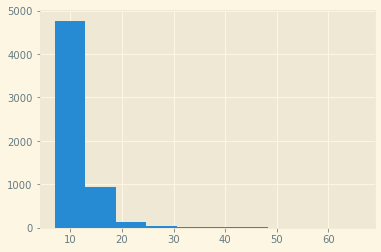

In [30]:
import matplotlib.pyplot as plt
plt.style.use("Solarize_Light2")
plt.hist(list(map( lambda s:round(np.mean(np.array(s))) ,sentence_length)))
plt.show()

In [31]:
np.mean(np.array(doc_length))

30.15995941832939

In [33]:
sentence_length

[[29, 3, 17, 9, 6, 4, 13, 12, 3, 7],
 [20,
  15,
  2,
  8,
  8,
  17,
  5,
  6,
  6,
  10,
  7,
  25,
  7,
  20,
  11,
  6,
  18,
  12,
  2,
  3,
  5,
  4,
  26,
  1,
  14,
  14,
  13,
  21,
  3,
  8,
  6,
  6,
  18,
  15,
  35,
  12,
  15,
  9,
  11,
  4,
  5,
  14,
  13,
  12,
  5,
  12,
  13,
  10,
  6,
  3,
  6,
  3,
  10,
  3,
  7],
 [26,
  13,
  22,
  14,
  5,
  11,
  16,
  3,
  4,
  2,
  5,
  3,
  10,
  13,
  3,
  6,
  27,
  13,
  6,
  7,
  10,
  8,
  4,
  12,
  9,
  5,
  11,
  22,
  2,
  7,
  19,
  9,
  5,
  16,
  7,
  4,
  9,
  9,
  5,
  9,
  7,
  3,
  14,
  7],
 [95,
  3,
  35,
  9,
  4,
  5,
  8,
  16,
  7,
  14,
  3,
  9,
  3,
  16,
  2,
  19,
  12,
  58,
  50,
  8,
  17,
  20,
  13,
  23,
  10,
  7,
  4,
  13,
  12,
  7,
  9,
  13,
  4,
  6,
  12,
  30,
  3,
  3,
  9,
  3,
  7],
 [22, 9, 7, 2, 8, 17, 8, 12, 2, 5],
 [28,
  6,
  19,
  11,
  10,
  14,
  16,
  8,
  11,
  14,
  17,
  5,
  10,
  16,
  12,
  23,
  13,
  5,
  6,
  8,
  7,
  8,
  9,
  9,
  9,
  19,
  11,
  3,
  11,

### 每一句的長度(flatten)

In [36]:
max([t for s_l in sentence_length for t in s_l])

583

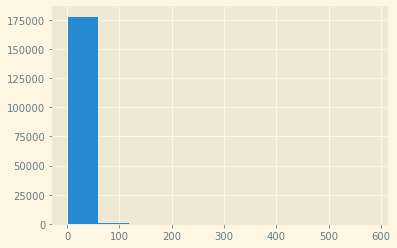

In [38]:
import matplotlib.pyplot as plt
plt.style.use("Solarize_Light2")
plt.hist([t for s_l in sentence_length for t in s_l])
plt.show()

### 每一篇Document長度

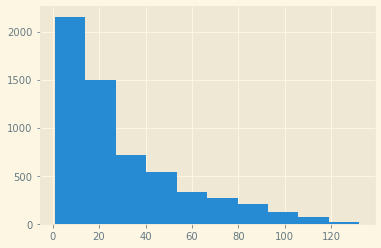

In [39]:
import matplotlib.pyplot as plt
plt.style.use("Solarize_Light2")
plt.hist(doc_length)
plt.show()

### Word Map

In [40]:
word_counter = {}
for doc_p in docs_p:
    for sent in doc_p:
        for voc in sent:
            if voc not in word_counter:
                word_counter[voc] = 1
            else:
                word_counter[voc] += 1

In [41]:
len(word_counter)

38611

In [42]:
word_counter['之']

63611

In [43]:
max_features = 35000
tokenizer = Tokenizer(num_words=max_features, oov_token='<unk>')
tokenizer.fit_on_texts([voc for doc_p in docs_p for sent in doc_p for voc in sent])

In [44]:
word2idx = tokenizer.word_index.copy()
idx2word = {word2idx[w]:w for w in word2idx}

In [45]:
docs_w2i = [[list(map( lambda s:word2idx.get(s,word2idx['<unk>']) ,sent )) for sent in doc_p] for doc_p in docs_p ]

In [46]:
import torch
torch.save({'docs': docs_w2i,
            'labels': tags_num,
            'sentences_per_document': doc_length,
            'words_per_sentence': sentence_length},
                'FIN_data.pth.tar')

In [47]:
with open('fin_word.json', 'w+',encoding='utf-8' ) as j:
    json.dump(word2idx ,j )
with open('fin_tag.json', 'w+',encoding='utf-8') as j:
    json.dump(tag2idx, j)

In [48]:
word2idx

{'<unk>': 1,
 '之': 2,
 '、': 3,
 '被告': 4,
 '本': 5,
 '裁定': 6,
 '條': 7,
 '院': 8,
 '於': 9,
 '刑事': 10,
 '項': 11,
 '應': 12,
 '訴訟': 13,
 '法院': 14,
 '原告': 15,
 '有': 16,
 '民事': 17,
 '為': 18,
 '依': 19,
 '第1': 20,
 '經': 21,
 '號': 22,
 '及': 23,
 '臺灣': 24,
 '其': 25,
 '判決': 26,
 '以': 27,
 '等': 28,
 '訴訟法': 29,
 '如': 30,
 '所': 31,
 '地方': 32,
 '律師': 33,
 '因': 34,
 '中華民國': 35,
 '主文': 36,
 '後': 37,
 '並': 38,
 '或': 39,
 '元': 40,
 '前': 41,
 '一': 42,
 '而': 43,
 '上訴人': 44,
 '規定': 45,
 '件': 46,
 '上訴': 47,
 '：': 48,
 '不': 49,
 '羈押': 50,
 '犯罪': 51,
 '人': 52,
 '理由': 53,
 '案件': 54,
 '即': 55,
 '檢察官': 56,
 '者': 57,
 '程序': 58,
 '上': 59,
 '上列': 60,
 '未': 61,
 '損害': 62,
 '代理人': 63,
 '與': 64,
 '提起': 65,
 '內': 66,
 '庭': 67,
 '二': 68,
 '駁回': 69,
 '在': 70,
 '係': 71,
 '按': 72,
 '認': 73,
 '違反': 74,
 '請求': 75,
 '款': 76,
 '第2': 77,
 '民國': 78,
 '1': 79,
 '送達': 80,
 '訴': 81,
 '日': 82,
 '自': 83,
 '案': 84,
 '辯護人': 85,
 '限制': 86,
 '詐欺': 87,
 '審': 88,
 '繳納': 89,
 '起訴': 90,
 '；': 91,
 '賠償': 92,
 '辯論': 93,
 '由': 94,
 '執行': 95,
 '三': 

In [84]:
for i in tags:
    print(i)
#     for j in i:
#         print(j)
    break

['刑事訴訟法220', '刑事訴訟法449 2']
